### 非定常問題バージョンのバンディット問題を実装する

In [21]:
import numpy as np
from non_stationary import *
from bandit import *

# 非定常問題（標本平均）
runs = 200  # 実験の回数
steps = 1000    # 各実験でのステップ数
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000)の形状の配列

for run in range(runs):
    bandit = NonStatBandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
    
    all_rates[run] = rates  # 報酬の結果を記録する

ave_rates = np.average(all_rates, axis = 0) # 各ステップで平均を求める

In [22]:
# 非定常問題（固定値${\alpha}$）
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
    non_stat_bandit = NonStatBandit()
    alpha_agent = AlphaAgent(epsilon, 0.9)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = alpha_agent.get_action()
        reward = non_stat_bandit.play(action)
        alpha_agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
    
    all_rates[run] = rates

alpha_ave_rates = np.average(all_rates, axis=0)

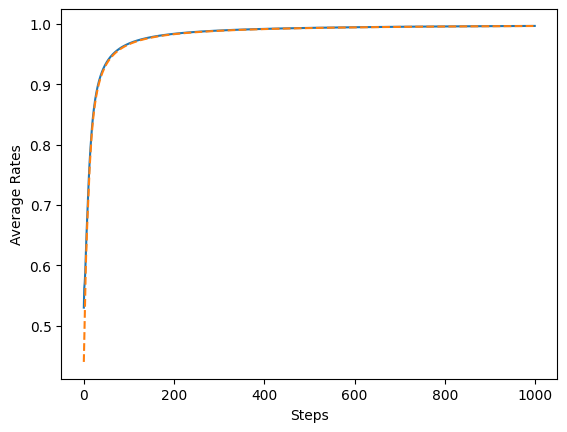

In [23]:
# 定常問題と非定常問題の比較
import matplotlib.pyplot as plt

plt.ylabel("Average Rates")
plt.xlabel("Steps")
plt.plot(ave_rates, label="sample average")
plt.plot(alpha_ave_rates, label="alpha const update", linestyle="--")
plt.show()